In [1]:
%load_ext autoreload
%autoreload 2 

In [2]:
import numpy as np
import pandas as pd

In [6]:
v0_df = pd.read_csv('input/g2net-detecting-continuous-gravitational-waves/v0.csv')[['id', 'target']]
v1_df = pd.read_csv('input/g2net-detecting-continuous-gravitational-waves/v1.csv')[['id', 'target']]
train = pd.read_csv('input/g2net-detecting-continuous-gravitational-waves/train_labels.csv')
test = pd.read_csv('input/g2net-detecting-continuous-gravitational-waves/sample_submission.csv')
train = train.loc[train['target'] != -1]
# v2_df = pd.read_csv('input/g2net-detecting-continuous-gravitational-waves/v2.csv')

In [17]:
v0_df['target'] = 0
v0_df['path'] = v0_df['id'].apply(
    lambda x: f'input/g2net-detecting-continuous-gravitational-waves/v0/{x}.pickle')
v1_df['target'] = 0
v1_df['path'] = v1_df['id'].apply(
    lambda x: f'input/g2net-detecting-continuous-gravitational-waves/v1/{x}.pickle')
v1_df

,id,target,path
0,pos_0,0,input/g2net-detecting-continuous-gravitational...
1,pos_1,0,input/g2net-detecting-continuous-gravitational...
2,pos_2,0,input/g2net-detecting-continuous-gravitational...
3,pos_3,0,input/g2net-detecting-continuous-gravitational...
4,pos_4,0,input/g2net-detecting-continuous-gravitational...
...,...,...,...
9995,neg_4995,0,input/g2net-detecting-continuous-gravitational...
9996,neg_4996,0,input/g2net-detecting-continuous-gravitational...
9997,neg_4997,0,input/g2net-detecting-continuous-gravitational...
9998,neg_4998,0,input/g2net-detecting-continuous-gravitational...


In [18]:
train['target'] = 1
train['path'] = train['id'].apply(
    lambda x: f'input/g2net-detecting-continuous-gravitational-waves/train/{x}.pickle')
test['target'] = 1
test['path'] = test['id'].apply(
    lambda x: f'input/g2net-detecting-continuous-gravitational-waves/test/{x}.pickle')
test

,id,target,path
0,00054c878,1,input/g2net-detecting-continuous-gravitational...
1,0007285a3,1,input/g2net-detecting-continuous-gravitational...
2,00076c5a6,1,input/g2net-detecting-continuous-gravitational...
3,001349290,1,input/g2net-detecting-continuous-gravitational...
4,001a52e92,1,input/g2net-detecting-continuous-gravitational...
...,...,...,...
7970,ffbce04ef,1,input/g2net-detecting-continuous-gravitational...
7971,ffc2d976b,1,input/g2net-detecting-continuous-gravitational...
7972,ffc905909,1,input/g2net-detecting-continuous-gravitational...
7973,ffe276f3e,1,input/g2net-detecting-continuous-gravitational...


In [21]:
pd.concat([test, v1_df]).reset_index(drop=True).to_csv('input/g2net-detecting-continuous-gravitational-waves/ps_v1_test.csv', index=False)

# Results

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
ps_results = pd.read_csv('results/ps_baseline/train_ps.csv')
v1_df = pd.read_csv('input/g2net-detecting-continuous-gravitational-waves/v1.csv')

In [13]:
v1_df = v1_df.merge(ps_results[['id', 'score_0']], on='id', how='left')

<AxesSubplot:xlabel='score_0', ylabel='Count'>

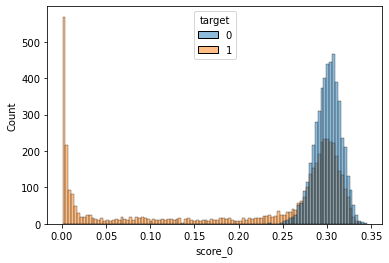

In [14]:
sns.histplot(data=v1_df, x='score_0', hue='target')

<AxesSubplot:xlabel='signal_depth', ylabel='score_0'>

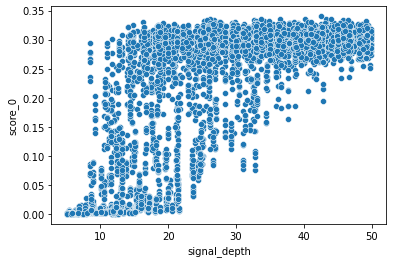

In [21]:
sns.scatterplot(data=v1_df.query('signal_depth != 1000'), x='signal_depth', y='score_0')

In [22]:
v1_df.loc[v1_df['score_0'] >= 0.05].to_csv('input/g2net-detecting-continuous-gravitational-waves/v1_cutoff_005.csv', index=False)

# Which param is important?

In [16]:
v1_df

,H1_outdir,H1_detectors,H1_sqrtSX,H1_SFTWindowType,H1_SFTWindowBeta,H1_Band,H1_F0,H1_F1,H1_F2,H1_Alpha,...,L1_Delta,L1_h0,L1_cosi,L1_psi,L1_phi,L1_tref,id,target,signal_depth,score_0
0,pyfstat,H1,1.000000e-23,tukey,0.01,0.4,183.914690,-2.084284e-10,0.0,1.756490,...,-1.380940,5.616604e-25,0.290683,0.222539,0.424990,1.238170e+09,pos_0,1,17.804354,0.306696
1,pyfstat,H1,1.000000e-23,tukey,0.01,0.4,196.441279,-5.834845e-12,0.0,0.068996,...,-0.860214,6.926387e-25,0.705480,0.182869,0.967752,1.238171e+09,pos_1,1,14.437542,0.010435
2,pyfstat,H1,1.000000e-23,tukey,0.01,0.4,119.688671,-2.570995e-11,0.0,4.226007,...,1.536731,4.812421e-25,0.075489,-0.499592,4.117386,1.238183e+09,pos_2,1,20.779562,0.308460
3,pyfstat,H1,1.000000e-23,tukey,0.01,0.4,288.929767,-2.921634e-11,0.0,4.152010,...,0.162181,2.682756e-25,-0.793666,-0.041265,3.830063,1.238166e+09,pos_3,1,37.275095,0.287558
4,pyfstat,H1,1.000000e-23,tukey,0.01,0.4,442.854748,-3.635328e-11,0.0,4.687098,...,-0.758823,3.382156e-25,-0.631286,-0.662619,4.942959,1.238175e+09,pos_4,1,29.566938,0.300181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,pyfstat,H1,1.000000e-23,tukey,0.01,0.4,347.261263,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,neg_4995,0,1000.000000,0.313322
9996,pyfstat,H1,1.000000e-23,tukey,0.01,0.4,244.540434,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,neg_4996,0,1000.000000,0.292868
9997,pyfstat,H1,1.000000e-23,tukey,0.01,0.4,175.164868,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,neg_4997,0,1000.000000,0.306171
9998,pyfstat,H1,1.000000e-23,tukey,0.01,0.4,191.560432,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,neg_4998,0,1000.000000,0.290178
